## Importing Basic Libraries

In [85]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

## Lets read the Dataset

In [86]:
# Read the dataset
data = pd.read_csv('movie_metadata.csv')

In [108]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,budget,title_year,imdb_score,movie_facebook_likes,Profit,Moviegenres,Genre1,Genre2,Genre3,Genre4
0,James Cameron,723.0,Long,Joel David Moore,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,237.0,2009.0,7.9,33000,523.505847,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi
1,Gore Verbinski,302.0,Long,Orlando Bloom,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,300.0,2007.0,7.1,0,9.404152,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action
2,Sam Mendes,602.0,Long,Rory Kinnear,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,245.0,2015.0,6.8,85000,-44.925825,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action
3,Christopher Nolan,813.0,Long,Christian Bale,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,250.0,2012.0,8.5,164000,198.130642,"[Action, Thriller]",Action,Thriller,Action,Action
5,Andrew Stanton,462.0,Long,Samantha Morton,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,263.7,2012.0,6.6,24000,-190.641321,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action


In [87]:
# Cheking shape of the Dataset
print(data.shape)

(5043, 28)


In [88]:
# Cheking information of Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Removing unnecassary columns

In [89]:
data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## cheking null values

In [90]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [91]:
#'gross' and 'budget' columns have large number of null values.
# droping all the rows where 'gross' and 'budget' contains null values.
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

data.isnull().sum()


director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [92]:
# The rows for which the sum of Null is less than two are retained

data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [93]:
#Replacing null vaues with mean and mode.

# Replacing value vith mean in numeric column.
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# Replacing values with mode. 
data['language'].fillna(data['language'].mode()[0], inplace = True)

# Replacing null values with "Unknown Actor" in actore column

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

data.isnull().sum().sum()

0

## Data Transformation

In [94]:
# Tranforming Gross and Budget into millions
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000


In [95]:
# Calculating Profit from Gross and Budget
data['Profit'] = data['gross'] - data['budget']

In [96]:
# lets also check the name of Top 10 Profitable Movies
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [97]:
# Lets check Duplicated Record in the dataset
print("Number of duplicated records in Dataset :",data.duplicated().sum())

Number of duplicated records in Dataset : 35


In [98]:
# Removing Duplicated Records

print("No. of Rows Before Removing Duplicates: ",data.shape[0])

data.drop_duplicates(subset = None, inplace = True)

print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888
No. of Rows After Removing Duplicates:  3853


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


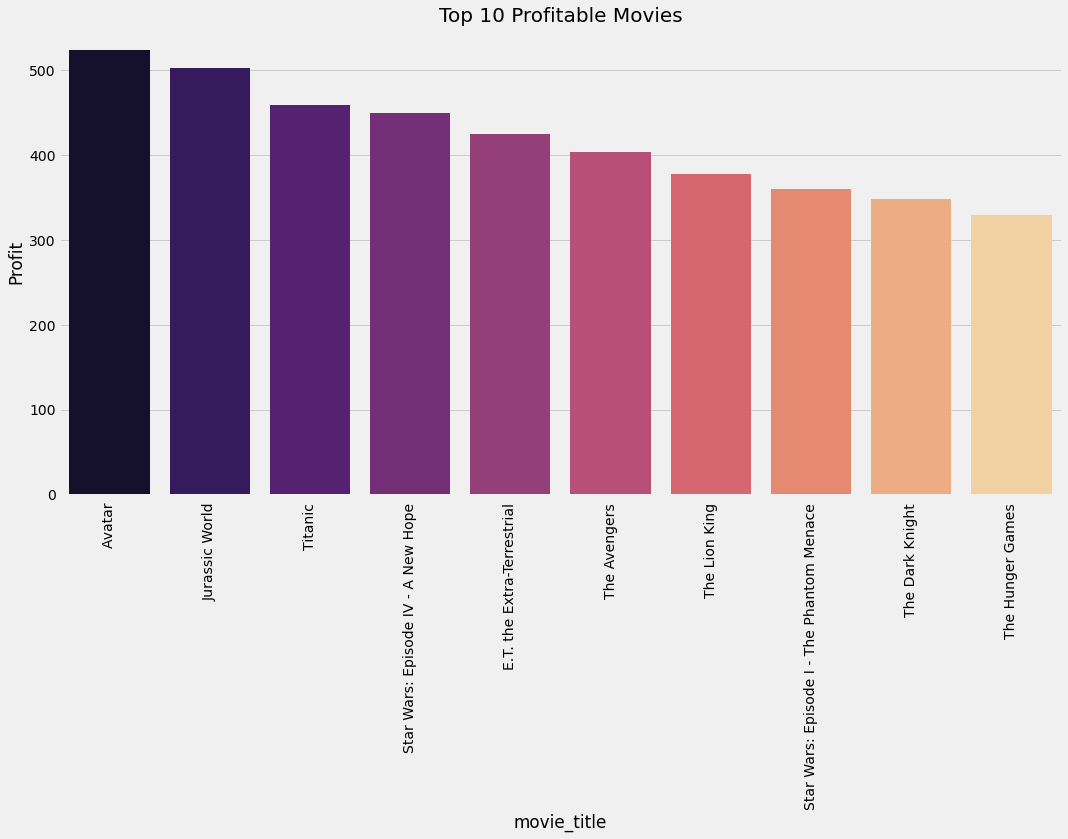

In [99]:
# Lets check the Top 10 Profitable Movies.

top_ten = data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

sns.barplot(top_ten['movie_title'],top_ten['Profit'],palette = 'magma')
plt.title('Top 10 Profitable Movies', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.show()
plt.show()

In [100]:
# lets check the values in the language column
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Persian          3
Hebrew           3
Danish           3
Thai             3
Dutch            3
Dari             2
Indonesian       2
Aboriginal       2
Zulu             1
Hungarian        1
None             1
Swedish          1
Filipino         1
Aramaic          1
Icelandic        1
Vietnamese       1
Telugu           1
Romanian         1
Russian          1
Dzongkha         1
Czech            1
Kazakh           1
Maya             1
Arabic           1
Mongolian        1
Bosnian          1
Name: language, dtype: int64

In [101]:
# Lets categoise movies into 3 CAtegories (English, Hindi and Foreign)
def language(x):
    if x == 'English':
        return 'English'
    elif x == 'Hindi':
        return 'Hindi'
    else:
        return 'Foreign'


data['language'] = data['language'].apply(language)

data['language'].value_counts()

English    3673
Foreign     170
Hindi        10
Name: language, dtype: int64

In [102]:
#Lets categorise movies in to three categories 
#     Short  <= 90 Minutd
#     Medium  between 91 to 120
#     Long  >=120

# Fuction, which is categorise movies in to three categories
def duration(x):
    if x <= 90:
        return 'Short'
    elif x>=90 and x<=120:
        return 'Medium'
    else:
        return 'Long'
    
# Apply function on dataset
data['duration'] = data['duration'].apply(duration)


data['duration'].value_counts()


Medium    2383
Long       917
Short      553
Name: duration, dtype: int64

In [103]:
# Cheking values in genres culumn

data['genres'].value_counts()

Drama                                                     153
Comedy|Drama|Romance                                      151
Comedy|Drama                                              147
Comedy                                                    145
Comedy|Romance                                            135
                                                         ... 
Action|Comedy|Sci-Fi|Western                                1
Animation|Comedy|Fantasy|Musical                            1
Crime|Drama|Mystery|Sci-Fi|Thriller                         1
Action|Biography|Drama|History|War                          1
Adventure|Animation|Comedy|Drama|Family|Fantasy|Sci-Fi      1
Name: genres, Length: 762, dtype: int64

In [104]:
data['genres'].str.split('|')[0]


['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [106]:
# Lots of movies have many Genre, So lets keep only first four out of given genres

#Spliting genre and converting it into list
data['Moviegenres'] = data['genres'].str.split('|')

data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Many Movies has only one genre, So we will fill rest of columns with first genre.
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0]) 


data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [107]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes', 'Profit',
       'Moviegenres', 'Genre1', 'Genre2', 'Genre3', 'Genre4'],
      dtype='object')

## Top 10 Most Popular Movies on Social Media

                              movie_title  Social_Media_Popularity
10    Batman v Superman: Dawn of Justice               1599.794424
150                         Ghostbusters               1076.336425
1582                        Ghostbusters               1075.827482
96                          Interstellar               1024.560802
3015               10 Days in a Madhouse                828.025478
945                       Into the Woods                692.937200
73                         Suicide Squad                652.816996
1190                Fifty Shades of Grey                624.306881
108                             Warcraft                622.790277
92          Independence Day: Resurgence                599.274128


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


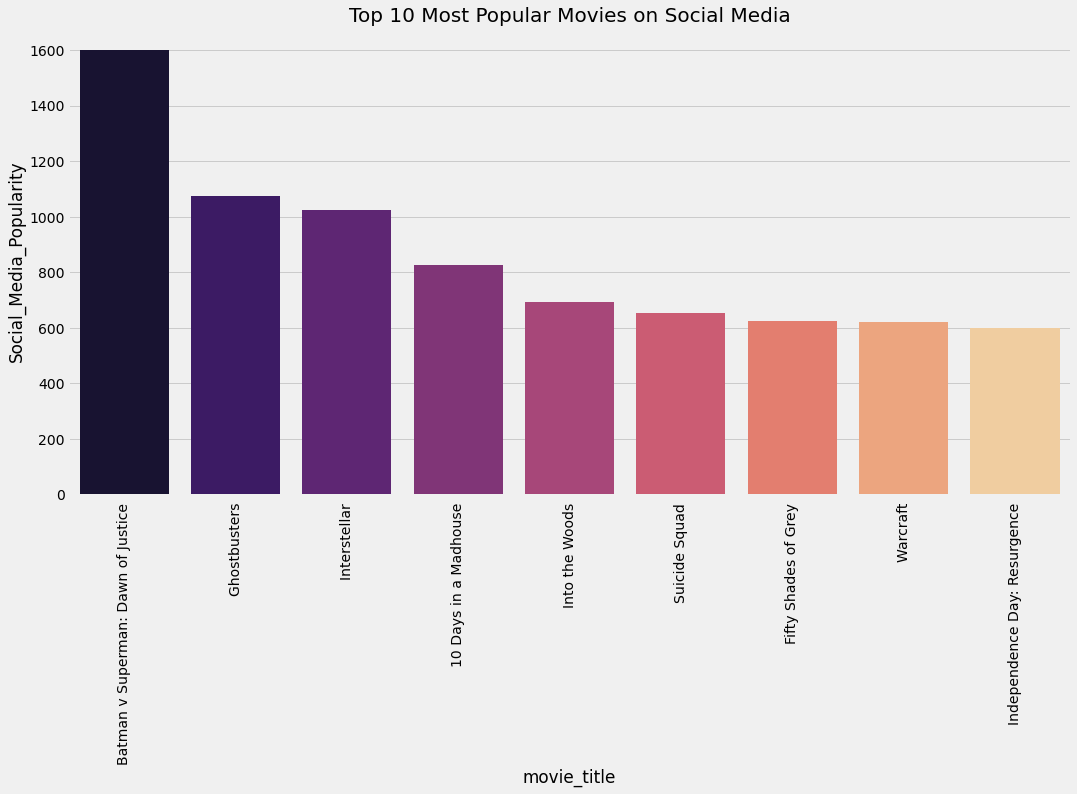

In [113]:
# Lets check which movies are most popular on social media

data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the [Top 10] Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10)
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')

plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.show()

## Gross Vs. Genres

In [116]:
# Lets compare the Gross with Genres

display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))


In [177]:
# Converting Year into Integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office by language')

popular_year = data[['title_year','language','Profit']].groupby(['language','title_year']).agg('sum').sort_values(by = ['language','Profit'],ascending = False)

popular_year.groupby(by = "language").head(3)

Most Profitable Years in Box Office


Profit
language title_year             
Hindi    2001           6.876974
         2013           3.231500
         2000          -0.389009
Foreign  1995          24.833860
         2000          11.500788
         1994           9.546543
English  2014        2729.797944
         2012        2701.504634
         2015        2364.554417

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


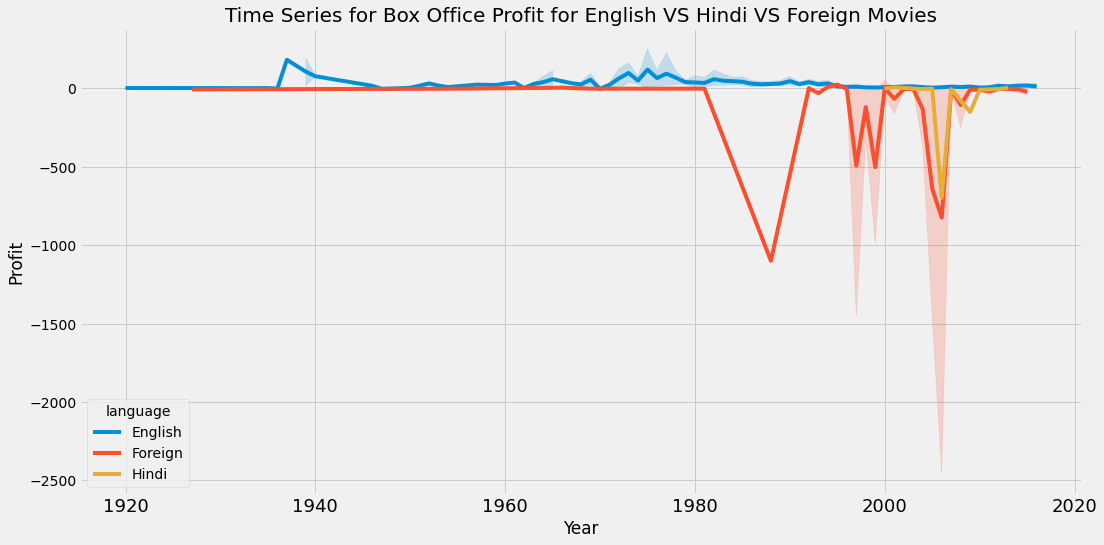

In [178]:
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English VS Hindi VS Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel('Year')
plt.show()


In [181]:
print("Top lost making movies")
data[data['Profit'] < -1000][['movie_title','language','Profit']]

Top lost making movies


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3423,Akira,Foreign,-1099.560838
3859,Lady Vengeance,Foreign,-4199.788333


## Gross Vs. Duration

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Medium,434.949459,424.449459
812,Deadpool,Medium,363.024263,305.024263
521,Despicable Me 2,Medium,368.049635,292.049635


,movie_title,duration,gross,Profit
509,The Lion King,Short,422.783777,377.783777
519,The Secret Life of Pets,Short,323.505540,248.505540
927,Shrek,Short,267.652016,207.652016


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gross Comparison')

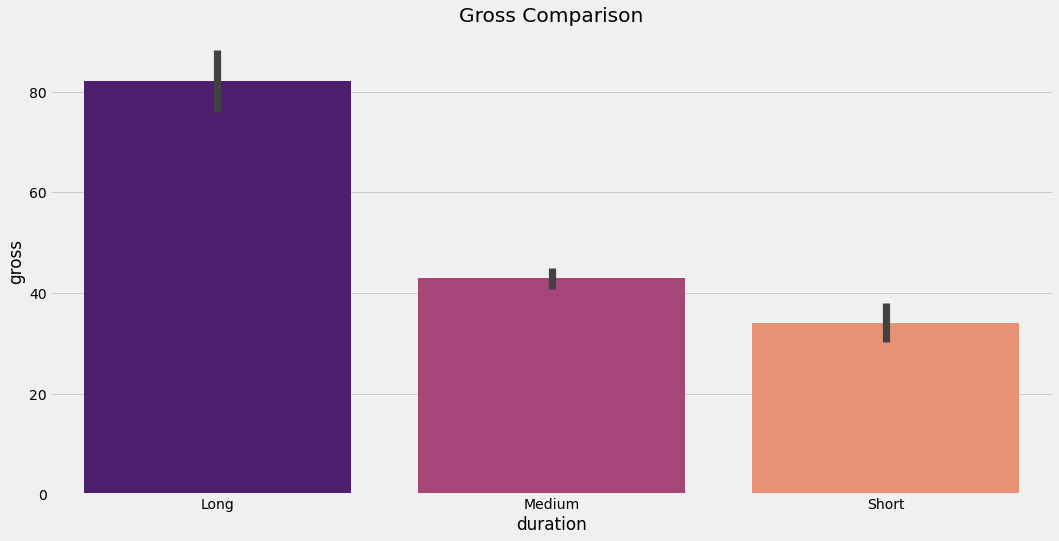

In [184]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross','Profit']]
                                        .sort_values(by = 'Profit',ascending = False)
                                        .head(3))

display(data[data['duration'] == 'Medium'][['movie_title', 'duration', 'gross','Profit']]
                                        .sort_values(by = 'Profit',ascending = False)
                                        .head(3))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross','Profit']]
                                        .sort_values(by = 'Profit',ascending = False)
                                        .head(3))

sns.barplot(data['duration'], data['gross'], palette = 'magma')
plt.title('Gross Comparison')

## Duration Vs. IMDB ratings

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Medium Duration Movies is 6.34
Average IMDB Score for Short Duration Movies is 6.02

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Medium Duration Movie
               movie_title  imdb_score
3175  American History X          8.6

Highest Rated Short Duration Movie
         movie_title  imdb_score
4427  Modern Times          8.6


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


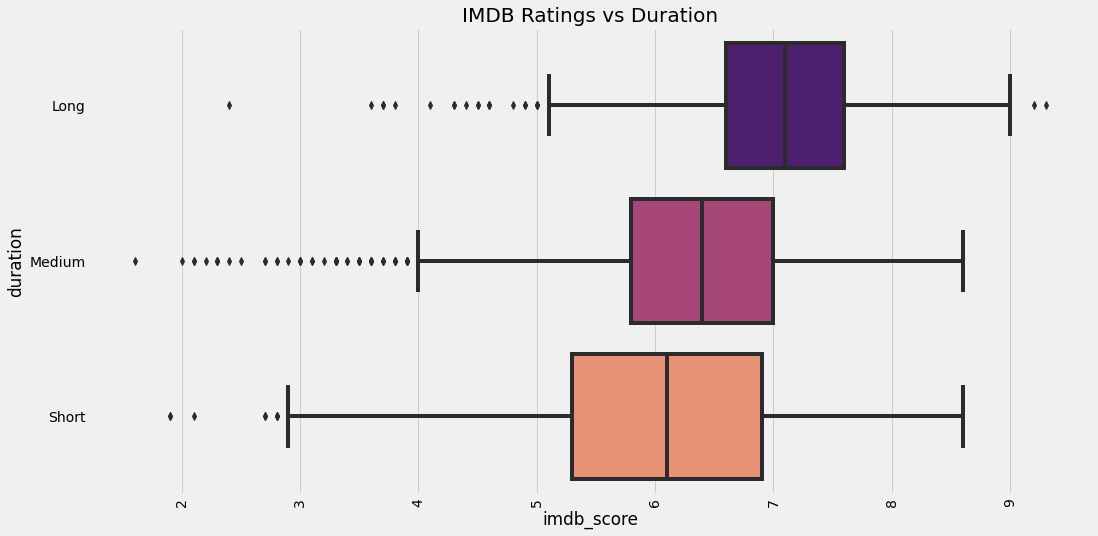

In [185]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Medium Duration Movies is {0:.2f}".format(data[data['duration'] == 'Medium']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False)
      .head(1))
print("\nHighest Rated Medium Duration Movie\n", 
    data[data['duration'] == 'Medium'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False)
      .head(1))

print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False)
      .head(1))

sns.boxplot(data['imdb_score'], data['duration'], palette = 'magma')
plt.title('IMDB Ratings vs Duration', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Inspecting Actor by passing the name of actor

In [211]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [212]:
query_actors('Johnny Depp')

,movie_title,budget,gross,title_year,genres,language,imdb_score
1,Pirates of the Caribbean: At World's End,300.0,309.404152,2007,Action|Adventure|Fantasy,English,7.1
13,Pirates of the Caribbean: Dead Man's Chest,225.0,423.032628,2006,Action|Adventure|Fantasy,English,7.3
14,The Lone Ranger,215.0,89.289910,2013,Action|Adventure|Western,English,6.5
18,Pirates of the Caribbean: On Stranger Tides,250.0,241.063875,2011,Action|Adventure|Fantasy,English,6.7
33,Alice in Wonderland,200.0,334.185206,2010,Adventure|Family|Fantasy,English,6.5
106,Alice Through the Looking Glass,170.0,76.846624,2016,Adventure|Family|Fantasy,English,6.4
118,Charlie and the Chocolate Factory,150.0,206.456431,2005,Adventure|Comedy|Family|Fantasy,English,6.7
134,Dark Shadows,100.0,79.711678,2012,Comedy|Fantasy|Horror,English,6.2
181,Rango,135.0,123.207194,2011,Adventure|Animation|Comedy|Family|Western,English,7.2
205,Pirates of the Caribbean: The Curse of the Bla...,140.0,305.388685,2003,Action|Adventure|Fantasy,English,8.1


## Making report for Actor

In [213]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(),"-", y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())

In [214]:
actors_report('Johnny Depp')

Time: 1984 - 2016
Max Gross : 423.03 Millions
Avg Gross : 96.93 Millions
Min Gross : 1.82 Millions
Number of 100 Million Movies : 10
Avg IMDB Score : 6.79
Most Common Genres:
 Action       9
Adventure    7
Biography    6
Drama        5
Comedy       4
Name: Genre1, dtype: int64


## Recommending Movies based on Languages

In [216]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)


In [217]:
recommend_lang('Hindi')

,language,movie_title,imdb_score
3344,Hindi,My Name Is Khan,8.0
3510,Hindi,Veer-Zaara,7.9
4385,Hindi,The Lunchbox,7.8
4490,Hindi,Monsoon Wedding,7.4
3877,Hindi,Paa,7.2
3276,Hindi,Jab Tak Hai Jaan,6.9
4572,Hindi,Fiza,6.2
3075,Hindi,Kabhi Alvida Naa Kehna,6.0
3455,Hindi,Ta Ra Rum Pum,5.4
4593,Hindi,Chocolate: Deep Dark Secrets,4.8


## Recommending Movies Based on Actors

In [218]:

def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [219]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3
